# Clase 4-Derivadas 

In [1]:
from pylab import *
#from scipy.special import *

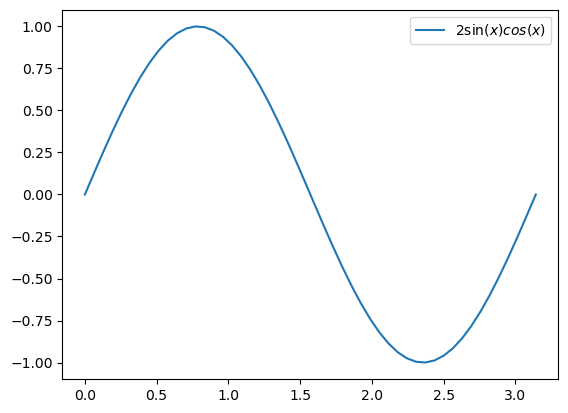

In [2]:
x=linspace(0,pi)
y = (sin(x))**2 +1
dy=2*sin(x)*cos(x)
#plot(x,y)
plot(x,dy,label="$2\sin(x)cos(x)$")#Grafica
legend() # Muestra la label asociada a las funciones en un recuadro
show()

In [3]:
def Euler(x,y):
    h = x[1]-x[0]
    dy=zeros_like(y)
    for i in range(len(y)-1):
        dy[i] = y[i+1]-y[i]#f_i+1-f_i
    dy[-1] = -y[-1]+y[-2] #f_n -f_n-1
    dy=dy/h
    return dy

def Deriv_h3(x,y):
    h = x[1]-x[0]
    h2 = 2*h
    dy=zeros_like(y)
    for i in range(1,len(y)-1):
        dy[i] = y[i+1]-y[i]#f_i+1-f_i-1
    dy[0]= (y[1] - y[0])/h    #f_1-f_0
    dy[-1] = (-y[-1]+y[-2])/h #f_n -f_n-1
    dy[1:-1] = dy[1:-1]/h2
    dy=dy/h
    return dy

In [4]:
dy_euler = Euler(x,y)
dy_h3 = Deriv_h3(x,y)

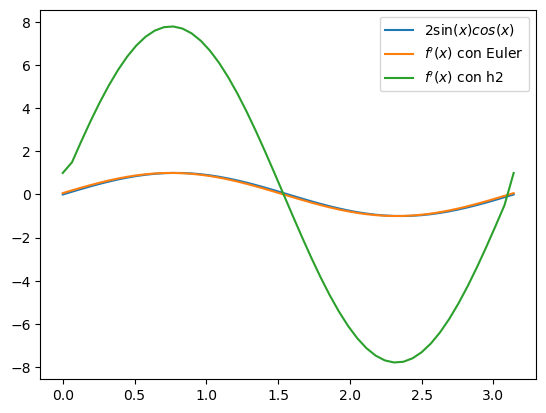

In [5]:
plot(x,dy,label="$2\sin(x)cos(x)$")#Grafica
plot(x,dy_euler,label="$f'(x)$ con Euler")
plot(x,dy_h3,label="$f'(x)$ con h2")
legend() # Muestra la label asociada a las funciones en un recuadro
show()

In [6]:
a=linspace(0,1,11)
print(a)
print(a[1:-1])
print(a[1:-2])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


In [7]:
#DERIVADA h3 PENDIENTE 

In [8]:
def Deriv_h3(x,y):
    h2 = 2*(x[1]-x[0])
    dy = zeros_like(y)
    for i in range(1,len(y)-1):
        dy[i] = y[i+1]-y[i-1]
    dy[0]=-3*y[0]+4*y[1]-y[2]
    dy[-1]=3*y[-1]-4*y[-2]+y[-3]
    dy=dy/h2
    return dy

In [9]:
dy_euler = Euler(x,y)
dy_h3 = Deriv_h3(x,y)

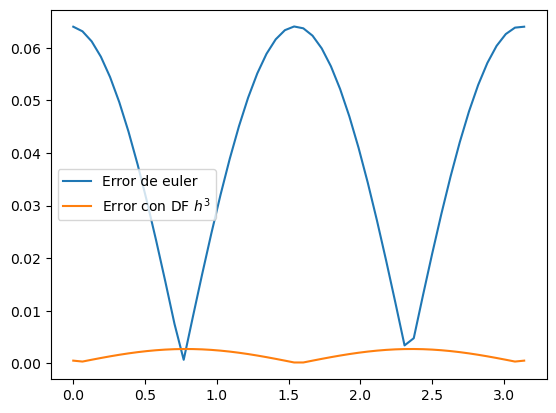

In [10]:
error_euler = abs(dy-dy_euler)
error_h3=abs(dy-dy_h3)
plot(x,error_euler,label="Error de euler")#Grafica
plot(x,error_h3,label="Error con DF $h^3$")
#plot(x,dy_h3,label="$f'(x)$ con h2")
legend() # Muestra la label asociada a las funciones en un recuadro
show()

##### Algoritmos relevantes en las derivadas vienen siendo  el de diferencia de extremos y el de Euler

### ahora veremos cuantos puntos necesita Euler para tener la misma presiciòn de h3

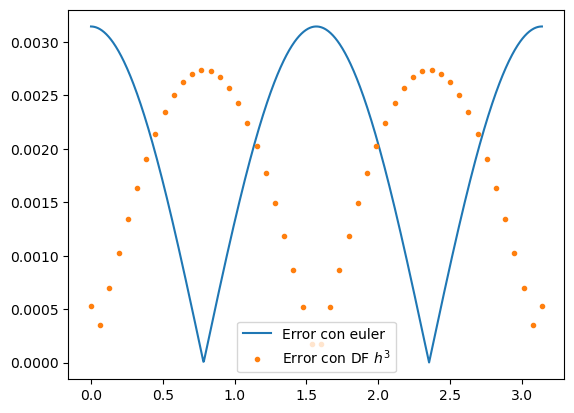

In [11]:
x_euler=linspace(0,pi,1000)
y_euler = sin(x_euler)**2 +1
dy_euler_exacto=2*cos(x_euler)*sin(x_euler)
dy_euler=Euler(x_euler,y_euler)
error_euler = abs(dy_euler_exacto-dy_euler)
plot(x_euler,error_euler,label= "Error con euler")
plot(x,error_h3,'.',label= "Error con DF $h^3$")
legend()
show()

# Metodo de EULER <<< METODO POR TYLOR



## Clase del 13 de febrero del 2024

In [60]:
def deriv_h5(x,y):
    dy = zeros_like(y)
    h12 = 12*(x[1]-x[0])
    dy = zeros_like(y)
    for i in range(2,len(y)-2):
        dy[i] = -y[i+2]+8*y[i+1]-8*y[i-1]+y[i-2] #puntos interiores
    dy[0]= -25*y[0]+48*y[1]-36*y[2]+16*y[3]-3*y[4] #dy en i=0
    dy[1]= -25*y[1]+48*y[2]-36*y[3]+16*y[4]-3*y[5]#dy en i=1
    dy[-1]=25*y[-1]-48*y[-2]+36*y[-3]-16*y[-4]+3*y[-5]#dy en i=-1
    dy[-2]=25*y[-2]-48*y[-3]+36*y[-4]-16*y[-5]+3*y[-6]#dy en i=-1
    dy=dy/h12
    return dy

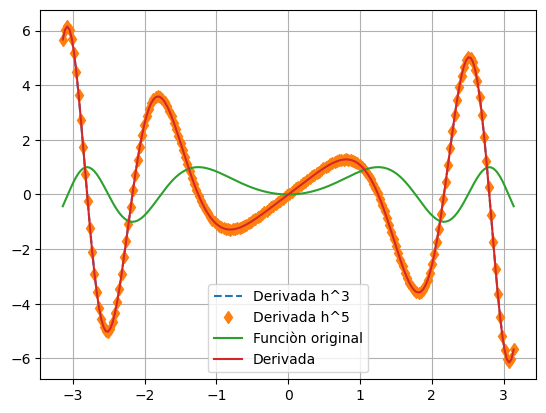

In [65]:
x = linspace(-pi,pi,200)
y=sin(x**2)
dy=2*x*cos(x**2)
dy_h3=Deriv_h3(x,y)
dy_h5=deriv_h5(x,y)
plot(x,dy_h3,"--",label="Derivada h^3")
plot(x,dy_h5,"d",label="Derivada h^5")
plot(x,y,label="Funciòn original")
plot(x,dy,label="Derivada")
legend()
grid()
show()

Max err h3 =  0.03897282076841435
Max err h3 =  0.0002875042718217813


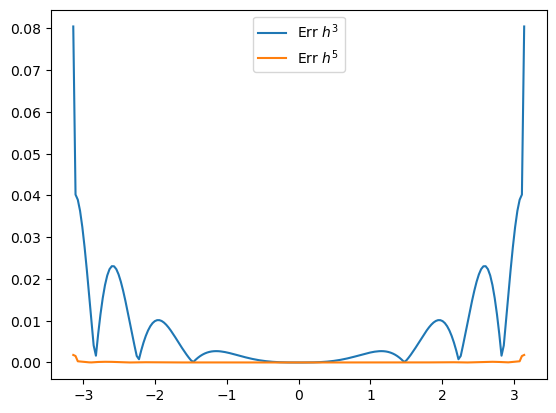

In [74]:
err_h3=abs(dy-dy_h3)
print("Max err h3 = ",err_h3[2:-2].max())
print("Max err h3 = ",error_h5[2:-2].max())
error_h5 = abs(dy-dy_h5)
plot(x,err_h3,label="Err $h^3$")
plot(x,error_h5,label="Err $h^5$")
legend()
show()